# Viscoelastic wave propagator with Zener formulation #

This tutorial was prepared by Paula Neves de Araujo (paulan@ime.usp.br).

This tutorial is an introduction to the isotropic viscoelastic wave propagator of Spyro using the Zener (or SLS) formulation. The tutorial is an adaptation of the elastic forward notebook and is similar to the tutorial for the viscoelastic Kelvin-Voigt model.

First, the notebook environment is configured and the required modules are imported. If you are running this notebook in Google colab, please copy the following code into a code block before running the notebook:

```python
# For use in colab only:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

!pip install git+https://github.com/NDF-Poli-USP/spyro.git

In [1]:
%matplotlib inline
import spyro
import numpy as np

from firedrake import *

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


In [11]:
dictionary = {
    "options": {
        "cell_type": "Q",
        "variant": "lumped",
        "degree": 4,
        "dimension": 2,
    },
    "parallelism": {
        "type": "automatic",
    },
    "mesh": {
        "Lz": 1.0,
        "Lx": 1.0,
        "mesh_file": None,
        "mesh_type": "firedrake_mesh",
    },
    "acquisition": {
        "source_type": "ricker",
        "source_locations": [(-0.5, 0.5)],
        "frequency": 5.0,
        "delay": 0.2,
        "delay_type": "time",
        "receiver_locations": spyro.create_transect((-1.9, 1.2), (-1.9, 1.8), 300),
    },
    "time_axis": {
        "initial_time": 0.0,
        "final_time": 0.5,
        "dt": 0.0005,
        "output_frequency": 100,
        "gradient_sampling_frequency": 1,
    },
    "visualization": {
        "forward_output": True,
        "forward_output_filename": "results/forward_output.pvd",
        "fwi_velocity_model_output": False,
        "velocity_model_filename": None,
        "gradient_output": False,
        "gradient_filename": "results/Gradient.pvd",
        "adjoint_output": False,
        "adjoint_filename": None,
        "debug_output": False,
    },
    "viscoelasticity": {
        "viscoelastic": True,
        "visco_type": 'zener',
        "tau_sigma": 10**(-4),
        "tau_epsilon": 10**(-3),
    },
}

dictionary["synthetic_data"] = {
    "type": "object",
    "density": 0.1,
    "p_wave_velocity": 1.5,
    "s_wave_velocity": 1.0,
    "real_velocity_file": None,
}

dictionary["acquisition"]["amplitude"] = np.array([0, 1])


Note that "viscoelastic" is set to **True**. If this parameter is set to **False**, the elastic wave propagation is performed. We also have the "visco_type" parameter which is used to define the model to be adopted. In this notebook, we address the Zener formulation, and we define two different viscoelasticity parameters: "tau_sigma" and "tau_epsilon". 

The **Zener model**, also known as the **Standard Linear Solid (SLS)** model, is a viscoelastic model that captures both elastic and time-dependent (relaxation) behaviors of materials. It consists of a spring in parallel with a **Kelvin–Voigt element** (a spring and dashpot in parallel).

![Zener model](zener_diagram.png)

This configuration allows the model to represent both instantaneous elastic response and gradual stress relaxation over time.

In the time domain, the constitutive equation can be written as:

$$
\sigma + \tau_\sigma \, \dot{\sigma} = \lambda \, \text{tr}(\varepsilon) \, I + 2\mu \, \varepsilon + \tau_\varepsilon \left( \lambda \, \text{tr}(\dot{\varepsilon}) \, I + 2\mu \, \dot{\varepsilon} \right)
$$

where:

- $\sigma$ is the stress tensor  
- $\varepsilon$ is the strain tensor  
- $\dot{\sigma}$ and $\dot{\varepsilon}$ are time derivatives  
- $\lambda$, $\mu$ are Lamé parameters  
- $\tau_\sigma$ is the stress relaxation time  
- $\tau_\varepsilon$ is the strain retardation time  
- $I$ is the identity tensor  
- $\text{tr}(\cdot)$ denotes the trace operator

This model is widely used for simulating **attenuation** and **dispersion** in viscoelastic wave propagation, especially when relaxation effects are important.


In the following, we build the "wave" object, which is an instance of "wave" type, and also stablish a periodic mesh for the example:

In [12]:
wave = spyro.IsotropicWave(dictionary)

wave.set_mesh(mesh_parameters={"dx": 0.025, "periodic": True})

Parallelism type: automatic


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/io/model_parameters.py:579: UserWarning: No velocity model set initially. If using user defined conditional or expression, please input it in the Wave object.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/solvers/wave.py:84: UserWarning: No mesh file, Firedrake mesh will be automatically generated.
  warnings.warn(


Finally, the wave propagation can be performed:

In [13]:
wave.forward_solve()

Viscoelastic Zener
Saving Displacement in: results/forward_outputsn0.pvd


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(


Simulation time is:        0.0 seconds
Simulation time is:       0.05 seconds
Simulation time is:        0.1 seconds
Simulation time is:       0.15 seconds
Simulation time is:        0.2 seconds
Simulation time is:       0.25 seconds
Simulation time is:        0.3 seconds
Simulation time is:       0.35 seconds
Simulation time is:        0.4 seconds
Simulation time is:       0.45 seconds
Simulation time is:        0.5 seconds


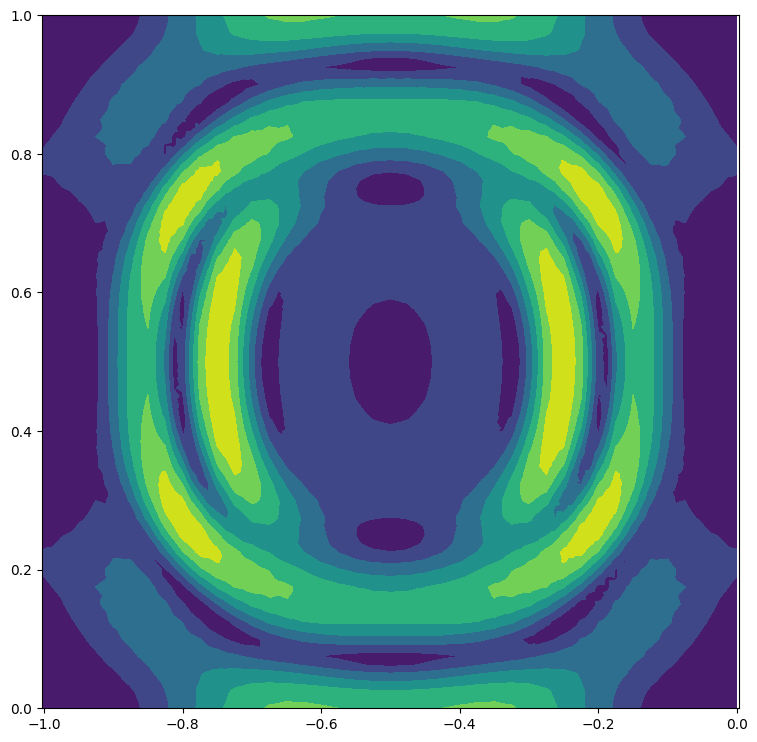

In [14]:
spyro.plots.plot_function(wave.u_n)

In the following, we show that, for $\tau_\sigma = \tau_\epsilon = 0.0$ the results coincide with the elastic case. We redefine the parameters dictionary and set "viscoelastic" as **False**:

In [15]:
dictionary = {
    "options": {
        "cell_type": "Q",
        "variant": "lumped",
        "degree": 4,
        "dimension": 2,
    },
    "parallelism": {
        "type": "automatic",
    },
    "mesh": {
        "Lz": 1.0,
        "Lx": 1.0,
        "mesh_file": None,
        "mesh_type": "firedrake_mesh",
    },
    "acquisition": {
        "source_type": "ricker",
        "source_locations": [(-0.5, 0.5)],
        "frequency": 5.0,
        "delay": 0.2,
        "delay_type": "time",
        "receiver_locations": spyro.create_transect((-1.9, 1.2), (-1.9, 1.8), 300),
    },
    "time_axis": {
        "initial_time": 0.0,
        "final_time": 0.5,
        "dt": 0.0005,
        "output_frequency": 100,
        "gradient_sampling_frequency": 1,
    },
    "visualization": {
        "forward_output": True,
        "forward_output_filename": "results/forward_output.pvd",
        "fwi_velocity_model_output": False,
        "velocity_model_filename": None,
        "gradient_output": False,
        "gradient_filename": "results/Gradient.pvd",
        "adjoint_output": False,
        "adjoint_filename": None,
        "debug_output": False,
    },
    "viscoelasticity": {
        "viscoelastic": False,
        "visco_type": 'zener',
        "tau_sigma": 10**(-4),
        "tau_epsilon": 10**(-3),
    },
}

dictionary["synthetic_data"] = {
    "type": "object",
    "density": 0.1,
    "p_wave_velocity": 1.5,
    "s_wave_velocity": 1.0,
    "real_velocity_file": None,
}

dictionary["acquisition"]["amplitude"] = np.array([0, 1])

Then we run the commands for the wave construction and propagation:

In [16]:
wave = spyro.IsotropicWave(dictionary)

wave.set_mesh(mesh_parameters={"dx": 0.025, "periodic": True})

wave.forward_solve()

Parallelism type: automatic


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/io/model_parameters.py:579: UserWarning: No velocity model set initially. If using user defined conditional or expression, please input it in the Wave object.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/solvers/wave.py:84: UserWarning: No mesh file, Firedrake mesh will be automatically generated.
  warnings.warn(


Isotropic elastic
Saving Displacement in: results/forward_outputsn0.pvd


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(


Simulation time is:        0.0 seconds
Simulation time is:       0.05 seconds
Simulation time is:        0.1 seconds
Simulation time is:       0.15 seconds
Simulation time is:        0.2 seconds
Simulation time is:       0.25 seconds
Simulation time is:        0.3 seconds
Simulation time is:       0.35 seconds
Simulation time is:        0.4 seconds
Simulation time is:       0.45 seconds
Simulation time is:        0.5 seconds


We obtain the following result:

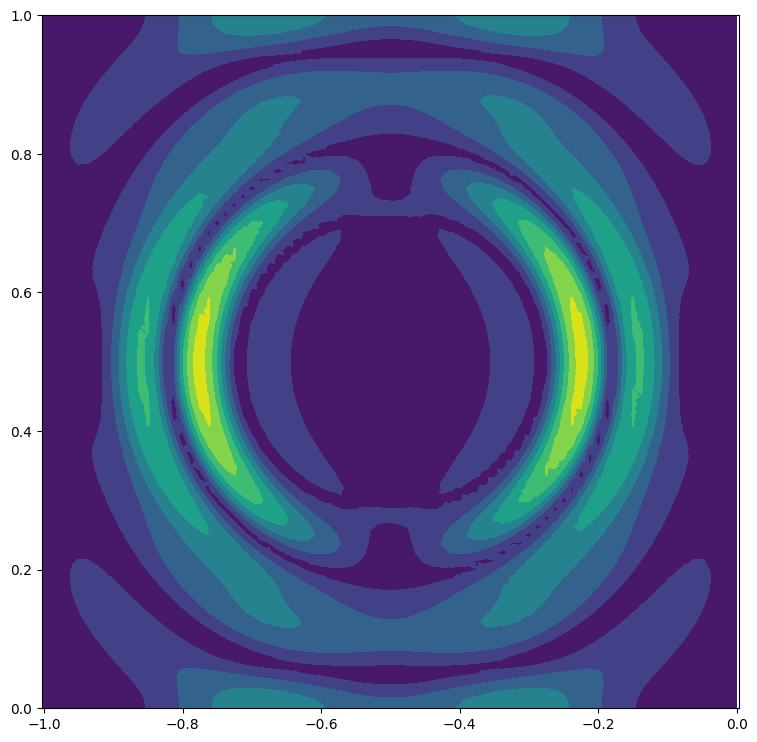

In [17]:
spyro.plots.plot_function(wave.u_n)

Finally, we run the same code for the viscoelastic Zener model with $\tau_\sigma=\tau_\epsilon=0.0:$

In [20]:
dictionary = {
    "options": {
        "cell_type": "Q",
        "variant": "lumped",
        "degree": 4,
        "dimension": 2,
    },
    "parallelism": {
        "type": "automatic",
    },
    "mesh": {
        "Lz": 1.0,
        "Lx": 1.0,
        "mesh_file": None,
        "mesh_type": "firedrake_mesh",
    },
    "acquisition": {
        "source_type": "ricker",
        "source_locations": [(-0.5, 0.5)],
        "frequency": 5.0,
        "delay": 0.2,
        "delay_type": "time",
        "receiver_locations": spyro.create_transect((-1.9, 1.2), (-1.9, 1.8), 300),
    },
    "time_axis": {
        "initial_time": 0.0,
        "final_time": 0.5,
        "dt": 0.0005,
        "output_frequency": 100,
        "gradient_sampling_frequency": 1,
    },
    "visualization": {
        "forward_output": True,
        "forward_output_filename": "results/forward_output.pvd",
        "fwi_velocity_model_output": False,
        "velocity_model_filename": None,
        "gradient_output": False,
        "gradient_filename": "results/Gradient.pvd",
        "adjoint_output": False,
        "adjoint_filename": None,
        "debug_output": False,
    },
    "viscoelasticity": {
        "viscoelastic": True,
        "visco_type": 'zener',
        "tau_sigma": 0.0,
        "tau_epsilon": 0.0,
    },
}

dictionary["synthetic_data"] = {
    "type": "object",
    "density": 0.1,
    "p_wave_velocity": 1.5,
    "s_wave_velocity": 1.0,
    "real_velocity_file": None,
}

dictionary["acquisition"]["amplitude"] = np.array([0, 1])

In [21]:
wave = spyro.IsotropicWave(dictionary)

wave.set_mesh(mesh_parameters={"dx": 0.025, "periodic": True})

wave.forward_solve()

Parallelism type: automatic


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/io/model_parameters.py:579: UserWarning: No velocity model set initially. If using user defined conditional or expression, please input it in the Wave object.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/solvers/wave.py:84: UserWarning: No mesh file, Firedrake mesh will be automatically generated.
  warnings.warn(


Viscoelastic Zener
Saving Displacement in: results/forward_outputsn0.pvd


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(


Simulation time is:        0.0 seconds
Simulation time is:       0.05 seconds
Simulation time is:        0.1 seconds
Simulation time is:       0.15 seconds
Simulation time is:        0.2 seconds
Simulation time is:       0.25 seconds
Simulation time is:        0.3 seconds
Simulation time is:       0.35 seconds
Simulation time is:        0.4 seconds
Simulation time is:       0.45 seconds
Simulation time is:        0.5 seconds


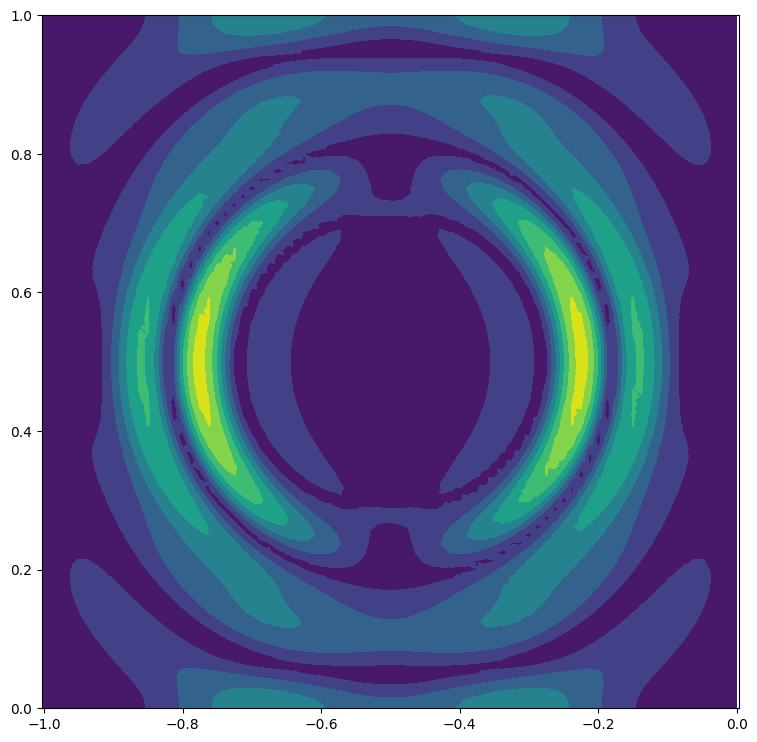

In [22]:
spyro.plots.plot_function(wave.u_n)

Let us set $\tau_\sigma$ and $\tau_\epsilon$ to different values:

In [29]:
dictionary["viscoelasticity"]["tau_sigma"] = 10**(-5)
dictionary["viscoelasticity"]["tau_epsilon"] = 10**(-4)
dictionary["time_axis"]["dt"] = 0.0005

And then we run the results for the new dictionary:

In [30]:
wave = spyro.IsotropicWave(dictionary)

wave.set_mesh(mesh_parameters={"dx": 0.025, "periodic": True})

wave.forward_solve()

Parallelism type: automatic


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/io/model_parameters.py:579: UserWarning: No velocity model set initially. If using user defined conditional or expression, please input it in the Wave object.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/spyro/solvers/wave.py:84: UserWarning: No mesh file, Firedrake mesh will be automatically generated.
  warnings.warn(


Viscoelastic Zener
Saving Displacement in: results/forward_outputsn0.pvd


/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(
/home/paulanevesdearaujo/venv-firedrake/lib/python3.12/site-packages/ufl/utils/sorting.py:88: UserWarning: Applying str() to a metadata value of type TensorProductQuadratureRule, don't know if this is safe.
  warnings.warn(


Simulation time is:        0.0 seconds
Simulation time is:       0.05 seconds
Simulation time is:        0.1 seconds
Simulation time is:       0.15 seconds
Simulation time is:        0.2 seconds
Simulation time is:       0.25 seconds
Simulation time is:        0.3 seconds
Simulation time is:       0.35 seconds
Simulation time is:        0.4 seconds
Simulation time is:       0.45 seconds
Simulation time is:        0.5 seconds


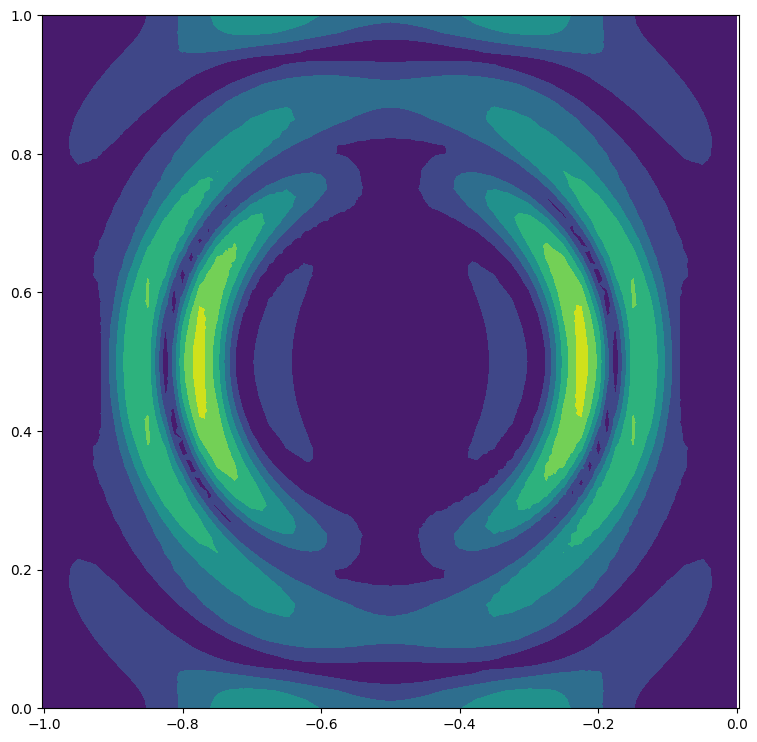

In [31]:
spyro.plots.plot_function(wave.u_n)